# Import Packages

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import pytz 
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import ast
import string
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from googletrans import Translator

# Import Data

In [5]:
df = pd.read_csv('data/data_extraction/covid19_indonesia.csv')

jakarta = pytz.timezone('Asia/Jakarta')
df['datetime_created'] = df['created_at'].apply(lambda x: datetime.strptime(x,'%a %b %d %H:%M:%S %z %Y').replace(tzinfo=pytz.UTC).astimezone(jakarta))
df['date_created'] = df['datetime_created'].apply(lambda x: x.date())
df['time_created'] = df['datetime_created'].apply(lambda x: x.time())
df = df.drop(['datetime_created'],axis=1)

In [57]:
df

,id,created_at,source,original_text,clean_text,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,date_created,time_created,word_length
0,1266039172315230209,Thu May 28 16:10:35 +0000 2020,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @ridwankamil: Minggu ini 60% Kota/Kab Jabar sudah di zona Biru (level 2) dan 40 % di zona kun...,kota kabupaten jabar zona biru level zona kuning level tidak zon,in,0,342,cmdblck,NaN,NaN,ridwankamil,NaN,NaN,2020-05-28,23:10:35,11
1,1266039166350983169,Thu May 28 16:10:33 +0000 2020,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @kompascom: Pembukaan mal tidak berarti akan berdampak pada masyarakat kecil. Hal itu karena ...,pembukaan mal tidak berdampak masyarakat kecil mal mal menyasar kalangan mene,in,0,12,Gulagulalibosku,NaN,NaN,kompascom,"Bandung, Jawa Barat",NaN,2020-05-28,23:10:33,11
2,1266039153487044608,Thu May 28 16:10:30 +0000 2020,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Pemerintah tentunya sudah melakukan kajian/pertimbangan2 yg matang terkait diberlakukannya New N...,melakukan kajian pertimbangan matang terkait diberlakukannya new normal catat presiden tidak men...,in,0,0,HmfaqihA,NaN,NaN,NaN,NaN,NaN,2020-05-28,23:10:30,23
3,1266039147149422592,Thu May 28 16:10:29 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>","RT @Covid19Update24: Indonesia #COVID19 growth rate is fastest in Asean Region, not looking to s...",growth rate is fastest in asean region not looking to slow down anytime soon will beat singapore,en,0,111,Summa_CL,NaN,COVID19,Covid19Update24,Road to Success🌟,NaN,2020-05-28,23:10:29,17
4,1266039127834636291,Thu May 28 16:10:24 +0000 2020,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",@iksansaptari Hahaha\r\nKokojo\r\nAing arek nonton pisan hindia 2 poe samemeh PSBB di tetap kan ...,hahaha kokojo arek nonton hindia poe samemeh kan eh batalkan eh ganti jadwal,in,0,0,Prayogaaaaaaa,NaN,NaN,iksansaptari,"Ciamis, Indonesia","[[108.391549, -7.363503], [108.494179, -7.363503], [108.494179, -7.293356], [108.391549, -7.2933...",2020-05-28,23:10:24,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,1265941403835588610,Thu May 28 09:42:05 +0000 2020,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Divisi kesehatan mengucapkan: Patuhi PSBB atau kita jadi kita jadi korlap https://t.co/av1RHrYLlz,divisi kesehatan mengucapkan patuhi korlap,in,0,0,IgnasiusSeno,False,NaN,NaN,NaN,NaN,2020-05-28,16:42:05,5
7818,1265941399150538752,Thu May 28 09:42:04 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",RT @jalastoria: Target Indonesia untuk mewujudkan kesetaraan gender mungkin hanya menjadi angan-...,target mewujudkan kesetaraan gender mungkin angan angan komponen dalam negara ti,in,0,3,jodidams,NaN,NaN,jalastoria,NaN,NaN,2020-05-28,16:42:04,11
7819,1265941382285242368,Thu May 28 09:42:00 +0000 2020,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @berlianidris: Gugus tugas #COVID19 menyatakan Surabaya bisa jadi Wuhan, sementara beredar ma...",gugus tugas surabaya wuhan beredar materi presentasi dinas pendidikan provinsi j,in,0,563,anndaryyyyy,NaN,COVID19,berlianidris,NaN,NaN,2020-05-28,16:42:00,11
7820,1265941381173805056,Thu May 28 09:41:59 +0000 2020,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","RT @Nadine_Oliv: Gara² PSBB kasur gampang rusak, jadi nyari lagi deh 🥴 https://t.co/Q2DfyaHasx",gara kasur gampang rusak deh,in,7,0,billyriawan,False,NaN,Nadine_Oliv,Bali-Dps,NaN,2020-05-28,16:41:59,5


In [58]:

clean_text = clean(df['full_text'][0])

#call clean_tweet method for extra preprocessing
    
filtered_tweet=clean_tweets(clean_text)

NameError: name 'clean' is not defined

In [6]:
df.head(10)

,id,created_at,source,original_text,clean_text,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,date_created,time_created
0,1266039172315230209,Thu May 28 16:10:35 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",RT @ridwankamil: Minggu ini 60% Kota/Kab Jabar...,kota kabupaten jabar zona biru level zona kuni...,in,0,342,cmdblck,NaN,NaN,ridwankamil,NaN,NaN,2020-05-28,23:10:35
1,1266039166350983169,Thu May 28 16:10:33 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",RT @kompascom: Pembukaan mal tidak berarti aka...,pembukaan mal tidak berdampak masyarakat kecil...,in,0,12,Gulagulalibosku,NaN,NaN,kompascom,"Bandung, Jawa Barat",NaN,2020-05-28,23:10:33
2,1266039153487044608,Thu May 28 16:10:30 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",Pemerintah tentunya sudah melakukan kajian/per...,pemerintah melakukan kajian pertimbangan matan...,in,0,0,HmfaqihA,NaN,NaN,NaN,NaN,NaN,2020-05-28,23:10:30
3,1266039147149422592,Thu May 28 16:10:29 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @Covid19Update24: Indonesia #COVID19 growth...,indonesia growth rate is fastest in asean regi...,en,0,111,Summa_CL,NaN,COVID19,Covid19Update24,Road to Success🌟,NaN,2020-05-28,23:10:29
4,1266039127834636291,Thu May 28 16:10:24 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",@iksansaptari Hahaha\r\nKokojo\r\nAing arek no...,hahaha kokojo arek nonton hindia poe samemeh p...,in,0,0,Prayogaaaaaaa,NaN,NaN,iksansaptari,"Ciamis, Indonesia","[[108.391549, -7.363503], [108.494179, -7.3635...",2020-05-28,23:10:24
5,1266039123531280384,Thu May 28 16:10:23 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",@Asknonym Itu lucu kok. Tapi pertanyaan gue pa...,lucu pas bilang jalan jalan deh ga psbb daerah,in,0,0,apotatohuman,NaN,NaN,Asknonym,Indonesia,NaN,2020-05-28,23:10:23
6,1266039120595304450,Thu May 28 16:10:22 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",RT @Bandungfess: Euy diperpanjang ceunah psbb ...,euy diperpanjang ceunah psbb na,in,0,72,Ririnrindiynt,False,NaN,Bandungfess,NaN,NaN,2020-05-28,23:10:22
7,1266039113712427010,Thu May 28 16:10:21 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",Orang yg masih ga menerapkan social distancing...,ga menerapkan social distancing psbb pikiranny...,in,0,0,DelimaOctaviani,NaN,NaN,NaN,Bandung barat,NaN,2020-05-28,23:10:21
8,1266039107844595712,Thu May 28 16:10:19 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",@DrSukamta @FPKSDPRRI Bkn tidak mampu \r\nTp s...,bukan tidak sptinya tekanan dr pengusaha nya s...,in,0,0,SusiloI,NaN,NaN,"DrSukamta, FPKSDPRRI",Jakarta,NaN,2020-05-28,23:10:19
9,1266039100110323714,Thu May 28 16:10:17 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",RT @detikcom: Menjelang era new normal pada 1 ...,menjelang era new normal jawa barat jabar terb...,in,0,58,Farhankemal,NaN,NaN,detikcom,NaN,NaN,2020-05-28,23:10:17


In [7]:
len(df)

7967

Removing Duplicate if any

In [8]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [9]:
len(df)

7967

# Extra Cleaning

In [10]:
len(df[df['clean_text'].isnull()==True])

65

In [11]:
pd.set_option('display.max_colwidth', None)
df[df['clean_text'].isnull()==True]['original_text']

643                                                                                                                                                                      https://t.co/ROCt57TV1S\r\n#PSBBsurabaya #PSBB #PSBBJakarta #PSBBMalangRaya #psbbbelumdilonggarkan #psbbkedodoran #surabaya
1268                                                           #BersiapMenujuNewNormal #mgmotor #mgmotors #motor #Morris #Garage #ZS #SUV #EXCITE #IGNITE #PSBB #Jakarta #siang #dirumahaja #TerserahIndonesia #indonesiaterserah #euroncap #dealer #MGRedefinedExpectation… https://t.co/rNdyro8ur7
1285                                                           #BersiapMenujuNewNormal #mgmotor #mgmotors #motor #Morris #Garage #ZS #SUV #EXCITE #IGNITE #PSBB #Jakarta #siang #dirumahaja #TerserahIndonesia #indonesiaterserah #euroncap #dealer #MGRedefinedExpectation… https://t.co/oKFE829Zml
1317                                                           #BersiapMenujuNewNormal #mgmotor #mgmotors #motor #Morris 

Removing Observation that the text become empty after cleaning, indicating that the text doesn't have significance sentiment

In [12]:
df = df.dropna(subset=['clean_text'])
df = df.reset_index(drop=True)

In [13]:
df.isnull().sum()

id                           0
created_at                   0
source                       0
original_text                0
clean_text                   0
lang                         0
favorite_count               0
retweet_count                0
original_author              0
possibly_sensitive        5558
hashtags                  6702
user_mentions             1807
place                     2624
place_coord_boundaries    7782
date_created                 0
time_created                 0
dtype: int64

In [14]:
df[df['lang']!='in']['lang'].value_counts()

lang
en     429
tl      17
fr       5
ca       4
ko       3
pt       3
und      2
da       1
fi       1
ja       1
es       1
zh       1
Name: count, dtype: int64

As there are some word not in Indonesian, possibly indonesian people using other language to tweet, those text will be translated in order to process the text

In [15]:
def trans(x,src):
    translator = Translator()
    try:
        sentence = translator.translate(x, src=src,dest='id').text
    except:
        sentence = x
    return sentence

In [16]:
df['clean_text'] = df.apply(lambda x: trans(x['clean_text'],x['lang']) if(x['lang']!='in') else x['clean_text'],axis=1)

In [17]:
clean_text = df['clean_text'].copy()

In [18]:
pd.set_option('display.max_colwidth', 100)
clean_text.tail(15)

7887                                                                                                gk psbb
7888                                                                    sby psbb ae marai tidak mudik mudik
7889                                                     update situasi terkini perkembangan indonesia utas
7890                                                                                               psbb day
7891    pelaku usaha mengapresiasi paket stimulus diberikan pemerintah dalam merespons pandemi covid keb...
7892                                                                      malang koyok ngono ae psbb mandeg
7893                                                       coba check point kacuk tidak diperiksa awal psbb
7894                                                     update situasi terkini perkembangan indonesia utas
7895    giat psbb cek point joglo teguran tertulis pengendara tidak tertib amp melanggar psbb sat lantas...
7896                        

In [19]:
def repair_exaggeration(x):
    word_tokens = word_tokenize(x)
    new_x =''
    for i in word_tokens:
        if (i =='psbb'):
            new = re.sub(r'(\w)\1\1+',r'\1\1',i)
            new_x = new_x +new+' '
        elif(i =='psb'):
            new = 'psbb'
            new_x = new_x +new+' '
        else:
            new = re.sub(r'(\w)\1\1\1+',r'\1',i)
            new_x = new_x +new+' '
    return new_x

def del_word(x,key_list):
    n = len(key_list)
    word_tokens = word_tokenize(x)
    new_x =''
    for word in word_tokens:
        if word not in key_list:
            new_x = new_x+word+' '
    return new_x

def clean_tweets(tweet):
   # nltk.download('stopwords')
    my_file = open("cleaning_source/combined_stop_words.txt", "r")
    content = my_file.read()
    stop_words = content.split("\n")
    file_2  = open("cleaning_source/update_combined_slang_words.txt", "r")
    content2 = file_2.read()
    slang_words = ast.literal_eval(content2)
    my_file.close()
    file_2.close()

    tweet = tweet.lower()
    #after tweepy preprocessing the colon left remain after removing mentions
    #or RT sign in the beginning of the tweet
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)

    #remove emojis from tweet
    #tweet = emoji_pattern.sub(r'', tweet)
    
    #remove punctuation manually
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    
    #remove tags
    tweet=re.sub("&lt;/?.*?&gt;","&lt;&gt;",tweet)
    
    #remove digits and special chars
    tweet=re.sub("(\\d|\\W)+"," ",tweet)

    #remove other symbol from tweet
    tweet = re.sub(r'â', '', tweet)
    tweet = re.sub(r'€', '', tweet)
    tweet = re.sub(r'¦', '', tweet)

    word_tokens = word_tokenize(tweet)
    for w in word_tokens:
        if w in slang_words.keys():
            word_tokens[word_tokens.index(w)] = slang_words[w]

    #filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []

    #looping through conditions
    for w in word_tokens:
        #check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in string.punctuation:
            filtered_tweet.append(w.lower())
    return ' '.join(filtered_tweet)

def count_words(x):
    words = word_tokenize(x)
    n=len(words)
    return n

Cleaning text that exaggerate the typing such as 'psbbbbbbbbb' 

In [20]:
clean_text_exag = clean_text.apply(lambda x: repair_exaggeration(x))

In [21]:
clean_text_exag.tail(15)

7887                                                                                               gk psbb 
7888                                                                   sby psbb ae marai tidak mudik mudik 
7889                                                    update situasi terkini perkembangan indonesia utas 
7890                                                                                              psbb day 
7891    pelaku usaha mengapresiasi paket stimulus diberikan pemerintah dalam merespons pandemi covid keb...
7892                                                                     malang koyok ngono ae psbb mandeg 
7893                                                      coba check point kacuk tidak diperiksa awal psbb 
7894                                                    update situasi terkini perkembangan indonesia utas 
7895    giat psbb cek point joglo teguran tertulis pengendara tidak tertib amp melanggar psbb sat lantas...
7896                        

Recleaning after remove exaggeration

In [22]:
re_clean = clean_text_exag.apply(lambda x: clean_tweets(x))

we use keywords for querying data, now we need to remove them as it will all found in every sentence in this data frame

In [23]:
keyword = ['psbb','psb','corona','covid19','indonesia','pemerintah','wfh','covid']
clean_text_extra = re_clean.apply(lambda x: del_word(x,keyword))

In [24]:
clean_text_extra.tail(15)

7887                                                                                                    gk 
7888                                                                        sby ae marai tidak mudik mudik 
7889                                                              update situasi terkini perkembangan utas 
7890                                                                                                   day 
7891    pelaku usaha mengapresiasi paket stimulus diberikan dalam merespons pandemi kebijakan perlu diti...
7892                                                                          malang koyok ngono ae mandeg 
7893                                                           coba check point kacuk tidak diperiksa awal 
7894                                                              update situasi terkini perkembangan utas 
7895    giat cek point joglo teguran tertulis pengendara tidak tertib amp melanggar sat lantas jakbar tn...
7896                        

In [25]:
df['clean_text'] = clean_text_extra

In [26]:
df['word_length'] = df['clean_text'].apply(lambda x:count_words(x))

In [27]:
df['word_length'].value_counts().sort_index()

word_length
0      80
1     239
2     842
3     326
4     361
5     523
6     340
7     682
8     377
9     392
10    477
11    982
12    410
13    471
14    182
15    167
16    217
17    208
18    123
19     72
20     91
21     85
22     42
23     43
24     43
25     28
26     16
27     13
28     16
29      9
30     10
31      6
32      2
33      5
34      4
35      7
36      1
37      4
38      1
40      1
44      1
45      1
46      1
48      1
Name: count, dtype: int64

In [28]:
df = df.drop(df[df['word_length']==0].index,axis=0)
df = df.reset_index(drop=True)

# Word Processing

## Create word dictionary

In [29]:
word_dict = {}
for i in range(0,len(df['clean_text'])):
    sentence = df['clean_text'][i]
    word_token = word_tokenize(sentence)
    for j in word_token:
        if j not in word_dict:
            word_dict[j] = 1
        else:
            word_dict[j] += 1

In [30]:
len(word_dict)

9253

In [31]:
len({k:v for (k,v) in word_dict.items() if v < 4})

7065

## Import Lexicon data

import lexicon, and remove negation words from lexicon, the lexicon is a combination from several sources below, that combined together, and include swear words which has the most negative score

sources : <br>
https://github.com/louisowen6/NLP_bahasa_resources <br>
https://github.com/abhimantramb/elang/blob/master/word2vec/utils/swear-words.txt <br>
https://github.com/fajri91/InSet <br>
https://github.com/agusmakmun/SentiStrengthID/blob/master/id_dict/sentimentword.txt 

In [29]:
negasi = ['bukan','tidak','ga','gk']
lexicon = pd.read_csv('lexicon/modified_full_lexicon.csv')
lexicon = lexicon.drop(lexicon[(lexicon['word'] == 'bukan')
                               |(lexicon['word'] == 'tidak')
                               |(lexicon['word'] == 'ga')|(lexicon['word'] == 'gk') ].index,axis=0)
lexicon = lexicon.reset_index(drop=True)

In [33]:
lexicon = pd.read_csv('lexicon/modified_full_lexicon.csv')


In [34]:
len(lexicon)

10250

In [35]:
lexicon.head(10)

,word,weight,number_of_words
0,hai,3,1
1,merekam,2,1
2,ekstensif,3,1
3,paripurna,1,1
4,detail,2,1
5,pernik,3,1
6,belas,2,1
7,welas,4,1
8,kabung,1,1
9,rahayu,4,1


In [36]:
lexicon_word = lexicon['word'].to_list()
lexicon_num_words = lexicon['number_of_words']

In [37]:
len(lexicon_word)

10250

Checking if there is words in dictionary that does not included in the lexicon

In [38]:
ns_words = []
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for word in word_dict.keys():
    if word not in lexicon_word:
        kata_dasar = stemmer.stem(word)
        if kata_dasar not in lexicon_word:
            ns_words.append(word)
len(ns_words)

6489

Let's take a look what kind of words they are, lets start with some words that have many occurences as this most likely not  a type case

In [39]:
len({k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3)) })

1313

In [40]:
ns_words_list = {k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3))}

It turns out that the words that is not included in lexicon, are the one that not have signifance sentiment

In [41]:
sort_orders = sorted(ns_words_list.items(), key=lambda x: x[1], reverse=True)
sort_orders=sort_orders[0:20]
for i in sort_orders:
    print(i[0], i[1])

new 1125
mall 861
barang 773
langgar 654
jabar 494
rakyat 474
zona 464
level 443
kota 424
ga 409
berjamur 381
awam 381
jik 380
daerah 363
in 318
kabupaten 296
to 294
s 287
jakarta 272
berskala 245


In [42]:
word_to_plot = df['clean_text'].copy()

In [43]:
word_to_plot_1 = word_to_plot.apply(lambda x: del_word(x,negasi))

NameError: name 'negasi' is not defined

creating word cloud to see what kind of words that appear often in the tweets related to the pandemic

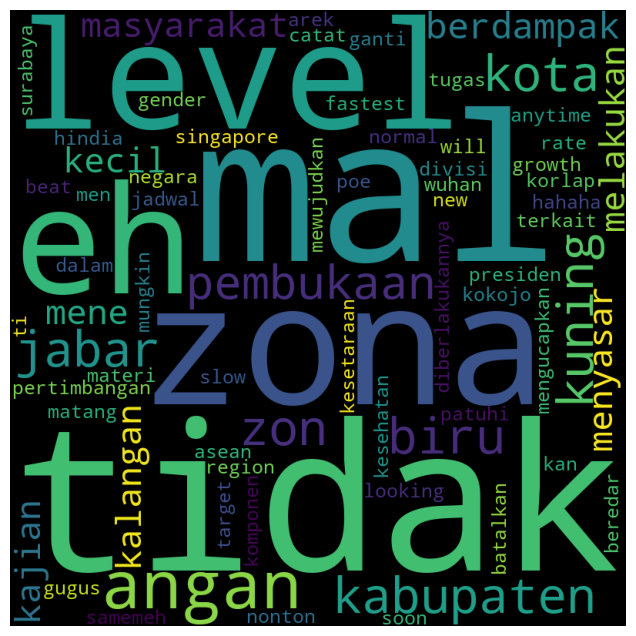

In [44]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', max_words = 1000
                      , min_font_size = 20).generate(str(word_to_plot))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## sentiment

In [45]:
lexicon['number_of_words'].value_counts()

number_of_words
1    9538
2     686
3      24
4       2
Name: count, dtype: int64

In [46]:
'pekerti' in word_dict

False

In [47]:
'budi baik' in lexicon_word

True

calculating the sentiment of words by mathing them to the lexicon while also creating the bag of words matrix

In [5]:
negasi = ['bukan','tidak','ga','gk']

sencol =[]
senrow =np.array([])
nsen = 0
factory = StemmerFactory()
stemmer = factory.create_stemmer()
sentiment_list = []
# function to write the word's sentiment if it is founded
def found_word(ind,words,word,sen,sencol,sentiment,add):
    # if it is already included in the bag of words matrix, then just increase the value
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
    #if not, than add new word
        sencol.append(word)
        sen.append(1)
        add += 1
    #if there is a negation word before it, the sentiment would be the negation of it's sentiment
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]
    
    return sen,sencol,sentiment,add
            
# checking every words, if they are appear in the lexicon, and then calculate their sentiment if they do
for i in range(len(df)):
    nsen = senrow.shape[0]
    words = word_tokenize(df['clean_text'][i])
    sentiment = 0 
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]
    
    for word in words:
        ind = words.index(word)
        # check whether they are included in the lexicon
        if word in lexicon_word :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        else:
        # if not, then check the root word
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
        # if still negative, try to match the combination of words with the adjacent words
            elif(n_words>1):
                if ind-1>-1:
                    back_1    = words[ind-1]+' '+word
                    if (back_1 in lexicon_word):
                        sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
                    elif(ind-2>-1):
                        back_2    = words[ind-2]+' '+back_1
                        if back_2 in lexicon_word:
                            sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
    # if there is new word founded, then expand the matrix
    if add>0:  
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
    # if there isn't then just update the old matrix
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))
        
    sentiment_list.append(sentiment)

NameError: name 'np' is not defined

In [ ]:
len(sentiment_list)

7822

In [ ]:
print(senrow.shape[0])

7822


constructing the data frame that contain bag of words and the sentiments that have been calculated before

In [4]:
sencol.append('sentiment')
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
df_sen = pd.DataFrame(sentiment_data,columns = sencol)

NameError: name 'sencol' is not defined

In [53]:
df_sen.head(10)

,kuning,tidak,buka,dampak,kecil,kajian,terkait,normal,celaka,nyinyir,...,mangkel,seni,realitas,menjemukan,respons,kacuk,mengucapkan,mewujudkan,tara,sentiment
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-9
1,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-2
2,0,1,0,0,0,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,-4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-2
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
8,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,11


In [54]:
df_sen

,kuning,tidak,buka,dampak,kecil,kajian,terkait,normal,celaka,nyinyir,...,mangkel,seni,realitas,menjemukan,respons,kacuk,mengucapkan,mewujudkan,tara,sentiment
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-9
1,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-2
2,0,1,0,0,0,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,-4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,11
7818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7
7819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-3
7820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


lets see if the sentiment is correct by looking at the original text

In [55]:
cek_df = pd.DataFrame([])
cek_df['text'] = df['original_text'].copy()
cek_df['sentiment']  = df_sen['sentiment'].copy()

In [56]:
cek_df

,text,sentiment
0,RT @ridwankamil: Minggu ini 60% Kota/Kab Jabar sudah di zona Biru (level 2) dan 40 % di zona kun...,-9
1,RT @kompascom: Pembukaan mal tidak berarti akan berdampak pada masyarakat kecil. Hal itu karena ...,-2
2,Pemerintah tentunya sudah melakukan kajian/pertimbangan2 yg matang terkait diberlakukannya New N...,-4
3,"RT @Covid19Update24: Indonesia #COVID19 growth rate is fastest in Asean Region, not looking to s...",-2
4,@iksansaptari Hahaha\r\nKokojo\r\nAing arek nonton pisan hindia 2 poe samemeh PSBB di tetap kan ...,-2
...,...,...
7817,Divisi kesehatan mengucapkan: Patuhi PSBB atau kita jadi kita jadi korlap https://t.co/av1RHrYLlz,11
7818,RT @jalastoria: Target Indonesia untuk mewujudkan kesetaraan gender mungkin hanya menjadi angan-...,7
7819,"RT @berlianidris: Gugus tugas #COVID19 menyatakan Surabaya bisa jadi Wuhan, sementara beredar ma...",-3
7820,"RT @Nadine_Oliv: Gara² PSBB kasur gampang rusak, jadi nyari lagi deh 🥴 https://t.co/Q2DfyaHasx",-1


In [ ]:
cek_df.head(10)

,text,sentiment
0,RT @ridwankamil: Minggu ini 60% Kota/Kab Jabar sudah di zona Biru (level 2) dan 40 % di zona kun...,-4
1,RT @kompascom: Pembukaan mal tidak berarti akan berdampak pada masyarakat kecil. Hal itu karena ...,3
2,Pemerintah tentunya sudah melakukan kajian/pertimbangan2 yg matang terkait diberlakukannya New N...,1
3,"RT @Covid19Update24: Indonesia #COVID19 growth rate is fastest in Asean Region, not looking to s...",-2
4,@iksansaptari Hahaha\r\nKokojo\r\nAing arek nonton pisan hindia 2 poe samemeh PSBB di tetap kan ...,-2
5,"@Asknonym Itu lucu kok. Tapi pertanyaan gue pas u bilang u jalan2, kok lu bisa jalan2 dah? Ga ad...",6
6,RT @Bandungfess: Euy diperpanjang ceunah psbb na https://t.co/prJeyzBW4i,2
7,"Orang yg masih ga menerapkan social distancing atau psbb itu pikirannya mungkin ""semua makhluk h...",8
8,@DrSukamta @FPKSDPRRI Bkn tidak mampu \r\nTp sptinya dpt tekanan dr pengusaha2 Nya.\r\nKt sdh ma...,2
9,"RT @detikcom: Menjelang era new normal pada 1 Juni 2020 di Jawa Barat (Jabar), terbit Surat Kepu...",11


# EDA

Text(0.5, 0, 'sentiment')

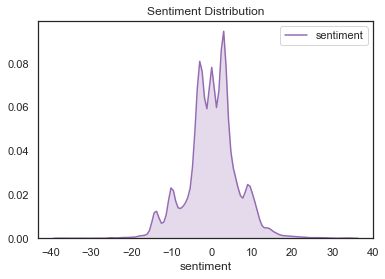

In [ ]:
sns.set(style="white", palette="muted", color_codes=True)
sns.kdeplot(df_sen['sentiment'],color='m',shade=True)
plt.title('Sentiment Distribution')
plt.xlabel('sentiment')

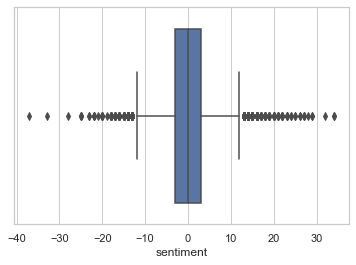

In [ ]:
sns.set(style="whitegrid") 
sns.boxplot(x=df_sen['sentiment'])

It look like the sentiments are equally distributed between positive and negative, to be sure, lets take a look at the mean

In [3]:
df.describe()

NameError: name 'df' is not defined

it's look like it is almost equally distributed , but the positive have a little bigger occurence here

Now let's take a look at the correlation between words that is included in the sentiment

In [2]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

#print("Top Absolute Correlations")
#print(get_top_abs_correlations(df_sen, 10))
au = get_top_abs_correlations(df_sen, 15)

NameError: name 'df_sen' is not defined

In [ ]:
print('Perfect Correlation')
au[au==1]

Perfect Correlation


pemberian    menghubungi    1.0
bakti        empang         1.0
ekor         ceroboh        1.0
sambang      kesah          1.0
mengartikan  pantesan       1.0
                           ... 
pengumuman   ketularan      1.0
perut        harus          1.0
berkilah     absurd         1.0
nabi         shalat         1.0
perut        ihh            1.0
Length: 156, dtype: float64

it turns out that there are 156 word that always occur together in every text, although we dont really see how much of the sentences that is included there but the correlation is pretty high

In [ ]:
top10 = au[au<float(1)][0:10]
label = top10.index
label_list =[]
for i in label:
    for j in i:
        if(j not in label_list):
            label_list.append(j)
            
df_sen_corr = df_sen[label_list]
corr = df_sen_corr.corr()
for i in label_list:
    for j in label_list:
        if i!=j:
            corr[i][j] = round(corr[i][j],3)
            

now let's take a look at other word, that is now always but often come together as the correlation quite high althoughh not equal to 1

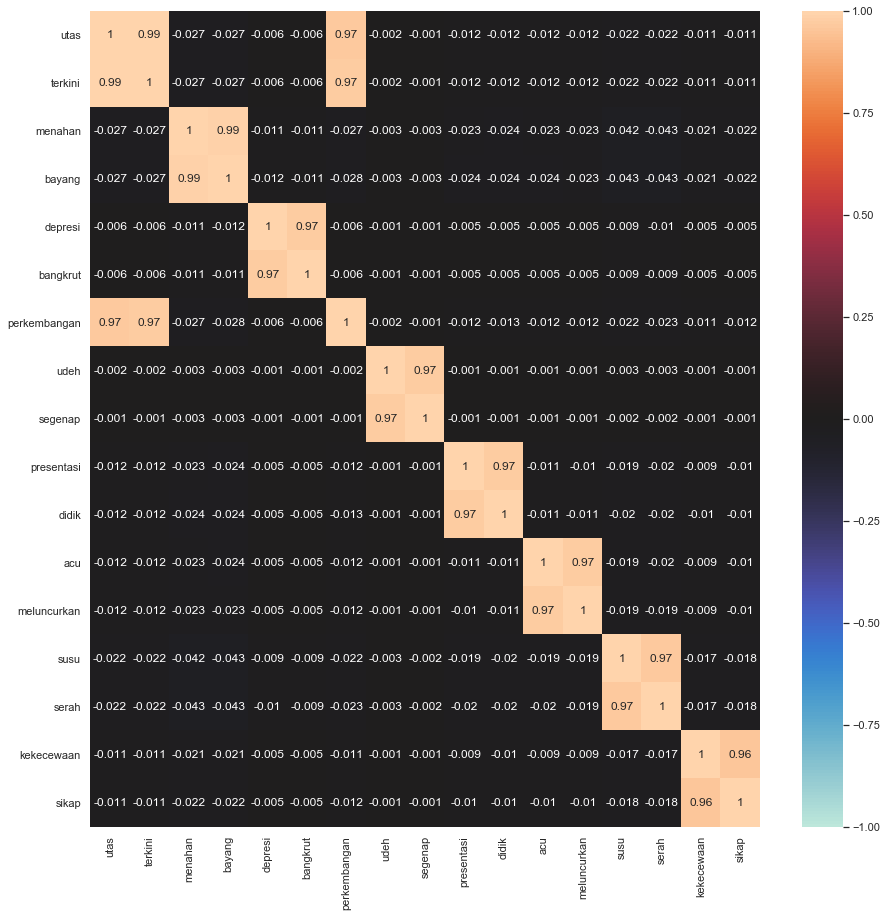

In [ ]:
plt.figure(figsize=(15,15))

h = sns.heatmap(corr, annot=True,vmin=-1, vmax=1, center= 0)

plt.show()

In [ ]:
top15 = au[au<float(1)][0:15]

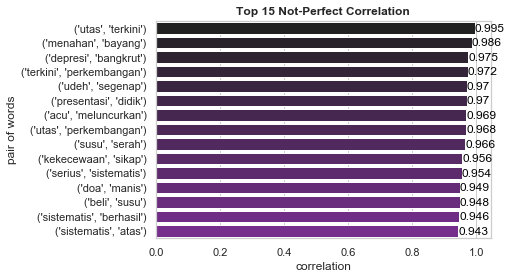

In [ ]:
pal =sns.dark_palette("purple", input="xkcd",n_colors=15)
g = sns.barplot(y = top15.index , x = top15,palette=pal)
g.grid=False
plt.xlabel('correlation')
plt.ylabel('pair of words')
plt.title("Top 15 Not-Perfect Correlation",fontweight='bold') 
for i in range(15):
    g.text(top15[i],i+0.22, round(top15[i],3),color='black')
plt.show()

It looks like most of them is naturally come together but there are some that not really immeadiately come to mind

now lets take a look at the most occured words among the set of words that is included in lexicon

In [ ]:
top15_word = df_sen.drop(['sentiment'],axis=1).sum().sort_values(ascending=False)[0:15]

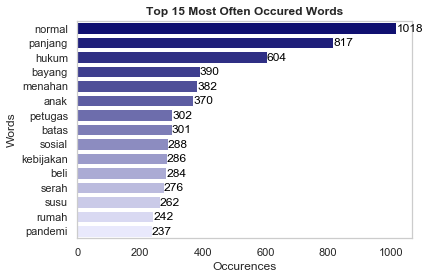

In [ ]:
#pal =sns.dark_palette("purple", input="xkcd",n_colors=15)
pal =sns.light_palette("navy", reverse=True,n_colors=15)
g = sns.barplot(y = top15_word.index , x = top15_word,palette=pal)
g.grid(False)
plt.xlabel('Occurences')
plt.ylabel('Words')
plt.title("Top 15 Most Often Occured Words",fontweight='bold') 
for i in range(15):
    g.text(top15_word[i],i+0.22, top15_word[i],color='black')
plt.show()

## Beyond Words

now we want to explore more than the word it self, hence we pass the sentiment into the original dataset and then explore some data there 

In [ ]:
df['sentiment'] = df_sen['sentiment']

In [ ]:
df.head(5)

,id,created_at,source,original_text,clean_text,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,date_created,time_created,word_length,sentiment
0,1266039172315230209,Thu May 28 16:10:35 +0000 2020,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @ridwankamil: Minggu ini 60% Kota/Kab Jabar sudah di zona Biru (level 2) dan 40 % di zona kun...,kota kabupaten jabar zona biru level zona kuning level tidak zon,in,0,342,cmdblck,NaN,NaN,ridwankamil,NaN,NaN,2020-05-28,23:10:35,11,-4
1,1266039166350983169,Thu May 28 16:10:33 +0000 2020,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @kompascom: Pembukaan mal tidak berarti akan berdampak pada masyarakat kecil. Hal itu karena ...,pembukaan mal tidak berdampak masyarakat kecil mal mal menyasar kalangan mene,in,0,12,Gulagulalibosku,NaN,NaN,kompascom,"Bandung, Jawa Barat",NaN,2020-05-28,23:10:33,11,3
2,1266039153487044608,Thu May 28 16:10:30 +0000 2020,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Pemerintah tentunya sudah melakukan kajian/pertimbangan2 yg matang terkait diberlakukannya New N...,melakukan kajian pertimbangan matang terkait diberlakukannya new normal catat presiden tidak men...,in,0,0,HmfaqihA,NaN,NaN,NaN,NaN,NaN,2020-05-28,23:10:30,23,1
3,1266039147149422592,Thu May 28 16:10:29 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>","RT @Covid19Update24: Indonesia #COVID19 growth rate is fastest in Asean Region, not looking to s...",growth rate is fastest in asean region not looking to slow down anytime soon will beat singapore,en,0,111,Summa_CL,NaN,COVID19,Covid19Update24,Road to Success🌟,NaN,2020-05-28,23:10:29,17,-2
4,1266039127834636291,Thu May 28 16:10:24 +0000 2020,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",@iksansaptari Hahaha\r\nKokojo\r\nAing arek nonton pisan hindia 2 poe samemeh PSBB di tetap kan ...,hahaha kokojo arek nonton hindia poe samemeh kan eh batalkan eh ganti jadwal,in,0,0,Prayogaaaaaaa,NaN,NaN,iksansaptari,"Ciamis, Indonesia","[[108.391549, -7.363503], [108.494179, -7.363503], [108.494179, -7.293356], [108.391549, -7.2933...",2020-05-28,23:10:24,13,-2


In [ ]:
df.isnull().sum()

id                           0
created_at                   0
source                       0
original_text                0
clean_text                   0
lang                         0
favorite_count               0
retweet_count                0
original_author              0
possibly_sensitive        5490
hashtags                  6623
user_mentions             1794
place                     2600
place_coord_boundaries    7703
date_created                 0
time_created                 0
word_length                  0
sentiment                    0
dtype: int64

lets take a look at the other factor that is correlated to the sentiment itself

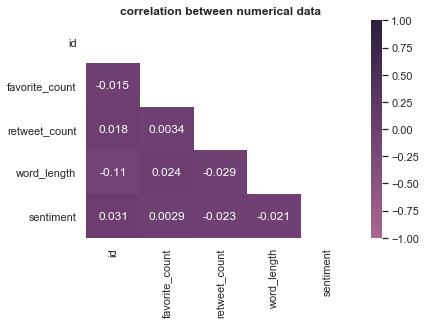

In [ ]:
plt.figure()
plt.title('correlation between numerical data',fontweight='bold')
df_corr = df.corr()
matrix = np.triu(df.corr())
cmap =  sns.cubehelix_palette(light=0.5, as_cmap=True)
h = sns.heatmap(df_corr, annot=True,vmin=-1, vmax=1, center= 0,mask=matrix,cmap = cmap)

plt.show()

from the numerical feature, it seems the correlation is very low, now lets take a look at the others

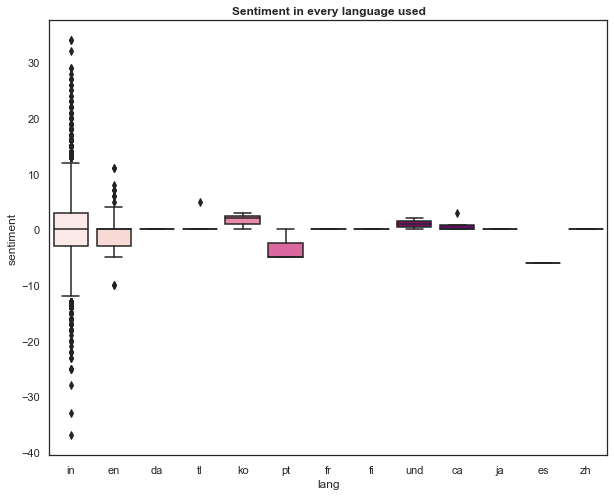

In [ ]:
sns.set(style="white", color_codes=True)
plt.figure(figsize=(10,8))
plt.title('Sentiment in every language used',fontweight='bold')
l = sns.boxplot(x='lang',y='sentiment',data=df,palette= sns.color_palette("RdPu", 10))

it looks like people from this time frame that  language 'ko' and 'und' always used to give positive sentiment while it is the opposite for 'pt' and 'es'

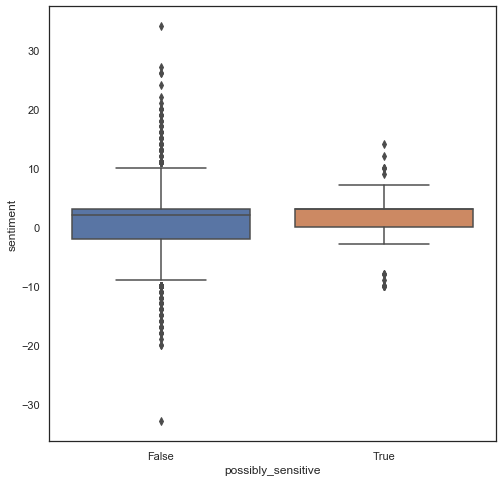

In [ ]:
cek_df = df.dropna(subset=['possibly_sensitive'])
cek_df = cek_df.reset_index(drop=True)
plt.figure(figsize=(8,8))
g = sns.boxplot(x='possibly_sensitive',y='sentiment',data=cek_df)
plt.show()

the sensitive content does not indicating the statement as they are almost equally distributed among them

In [ ]:
df_place = df.groupby(['place']).mean().sort_values(by='sentiment',ascending=False)
df_place = df_place.reset_index()

In [ ]:
df_place_dict = df.groupby(['place']).count().sort_values(by='id',ascending=False)['id'].to_dict()

In [ ]:
df_place['number_of_tweets'] =  df_place.apply(lambda x:df_place_dict[x['place']],axis=1)

In [ ]:
top10_place_pos = df_place.sort_values(by='sentiment',ascending=False)[0:10].reset_index(drop=True)
top10_place_neg = df_place.sort_values(by='sentiment',ascending=True)[0:10].reset_index(drop=True)
top10_place     = df_place.sort_values(by='number_of_tweets',ascending=False)[0:10].reset_index(drop=True)

now let's take a look at some places where the sentiment that is made from them is tend to be sensitive and also for places that made otherwise

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56814 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56809 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 55356 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 56814 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 56809 missing from current font.
  font.set_text(s, 0, flags=flags)


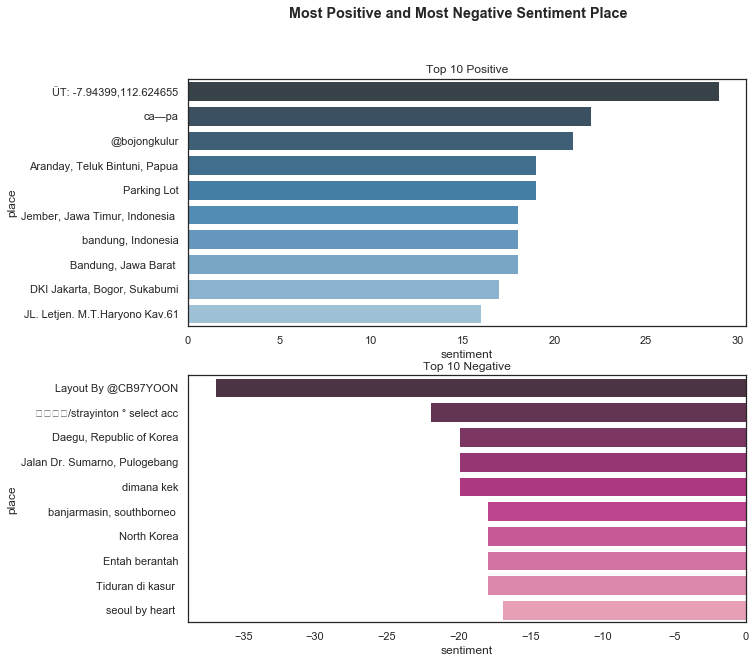

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,10))
fig.suptitle('Most Positive and Most Negative Sentiment Place',fontweight='bold')
h = sns.barplot(y='place',x='sentiment',data=top10_place_pos,ax=ax1,palette=sns.color_palette("Blues_d",n_colors=10))
n = sns.barplot(y='place',x='sentiment',data=top10_place_neg,ax=ax2,palette=sns.color_palette('RdPu_d',n_colors=10))
ax1.set_title('Top 10 Positive')
ax2.set_title('Top 10 Negative')
plt.show()

last but not least, let's take a look at some places where tweets is most often come from

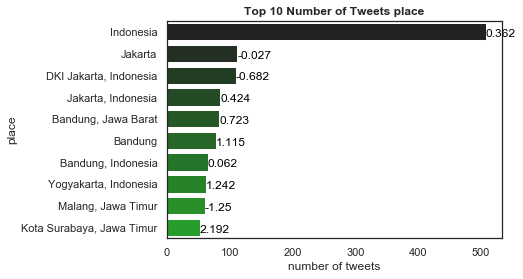

In [ ]:
pal =sns.dark_palette("green", input="xkcd",n_colors=10)
g = sns.barplot(y = top10_place['place'] , x = top10_place['number_of_tweets'],palette=pal)
g.grid=False
plt.xlabel('number of tweets')
plt.ylabel('place')
plt.title("Top 10 Number of Tweets place",fontweight='bold') 

for i in range(10):
    g.text(top10_place['number_of_tweets'][i], i+0.22 ,round(top10_place['sentiment'][i],3),color='black')
    
plt.show()